#Loading Data

In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [42]:
# import necessary packages
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# import sales data
sales_import = '/content/drive/My Drive/Coursework/sales_predictions_2023.csv'

# load the data in pandas

data = pd.read_csv(sales_import)
# preview the data
data.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
data.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [ ]:
data.info()
print('\n')
print('There are 8523 rows and 12 columns')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


There are 8523 rows and 12 columns


#Data Cleaning

In [ ]:
# Scan the data for any duplicate data

data.duplicated().sum()
print('\n')
print('There are no Duplicates')



There are no Duplicates


In [ ]:
# Identify any missing values

null_sums = data.isna().sum()


In [ ]:
# Calculate the percentage of missing values

null_percent = null_sums/len(data) * 100

null_percent

Item_Identifier              0.0
Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Identifier            0.0
Outlet_Establishment_Year    0.0
Outlet_Size                  0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
Item_Outlet_Sales            0.0
dtype: float64

Address the null values starting with the numerical column

In [ ]:
data['Item_Weight'] = data['Item_Weight'].fillna(-1)

Now the Object column

In [ ]:
data['Outlet_Size'] = data['Outlet_Size'].fillna( 'Medium')

#fix the value counts for above
data['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Group The columns for later use

In [54]:
num_cols = data.select_dtypes(include='number')
num_cols

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999,3735.1380
1,5.920,0.019278,48.2692,2009,443.4228
2,17.500,0.016760,141.6180,1999,2097.2700
3,19.200,0.000000,182.0950,1998,732.3800
4,8.930,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834
8519,8.380,0.046982,108.1570,2002,549.2850
8520,10.600,0.035186,85.1224,2004,1193.1136
8521,7.210,0.145221,103.1332,2009,1845.5976


In [56]:
obj_cols = data.select_dtypes(include='object')
obj_cols

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,Medium,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


In [46]:
data['Item_Fat_Content'].head(50)
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':"Low Fat"})
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'low fat':"Low Fat"})
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'reg':"Regular"})

#Display The Data

In [ ]:
# Use .describe in a for string to much more efficiently print the summary stats
for col in num_cols:
  print(f'Stats for:{col}')
  print(data[col].describe())
  print('\n')

Stats for:Item_Weight
count    8523.000000
mean       10.478936
std         6.720742
min        -1.000000
25%         6.650000
50%        11.000000
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64


Stats for:Item_Visibility
count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64


Stats for:Item_MRP
count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64


Stats for:Outlet_Establishment_Year
count    8523.000000
mean     1997.831867
std         8.371760
min      1985.000000
25%      1987.000000
50%      1999.000000
75%      2004.000000
max      2009.000000
Name: Outlet_Establishment_Year, dtype: float64


Stats for:Item_Outlet_Sales
count     8523.000000
mean      2181.2

In [ ]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.478936,0.066132,140.992782,1997.831867,2181.288914
std,6.720742,0.051598,62.275067,8.371760,1706.499616
min,-1.000000,0.000000,31.290000,1985.000000,33.290000
25%,6.650000,0.026989,93.826500,1987.000000,834.247400
50%,11.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Confirm no more null sums exist

In [ ]:
null_sums

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

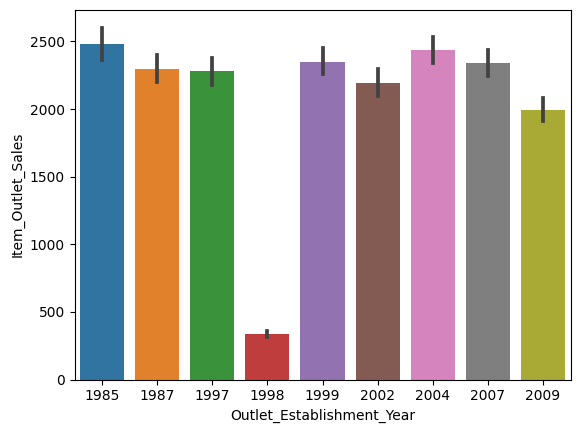

In [62]:
ax = sns.barplot(data=data, x='Outlet_Establishment_Year', y='Item_Outlet_Sales')

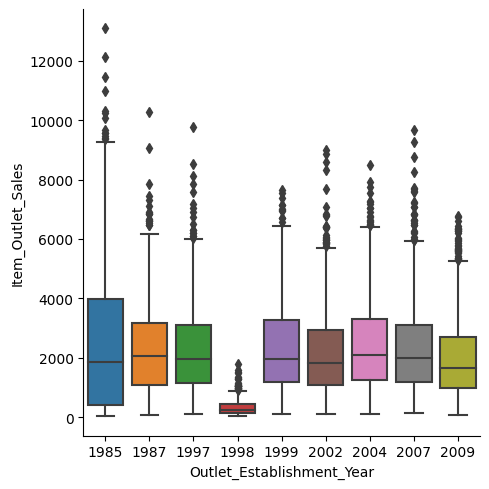

In [72]:
g = sns.catplot(data=data, x='Outlet_Establishment_Year', y='Item_Outlet_Sales',kind='box', dodge=False)

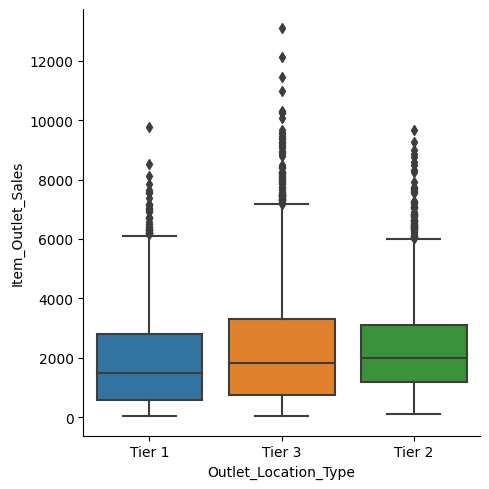

In [77]:
g = sns.catplot(data=data, x='Outlet_Location_Type', y='Item_Outlet_Sales',kind='box', dodge=False)
ax.tick_params(axis='x', rotation=90)

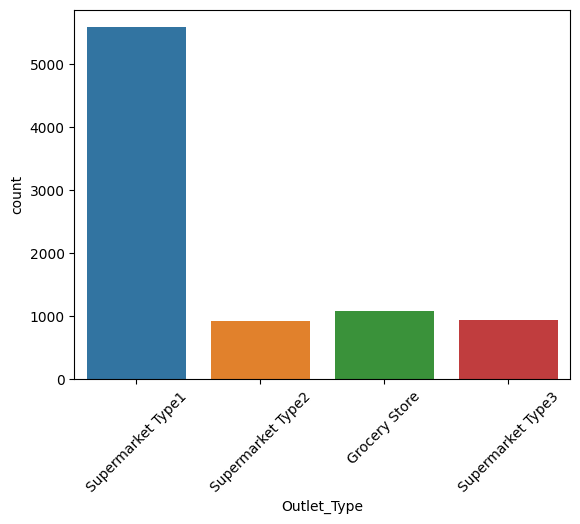

In [74]:
ax = sns.countplot(data=data , x='Outlet_Type')
ax.tick_params(axis='x', rotation=45)

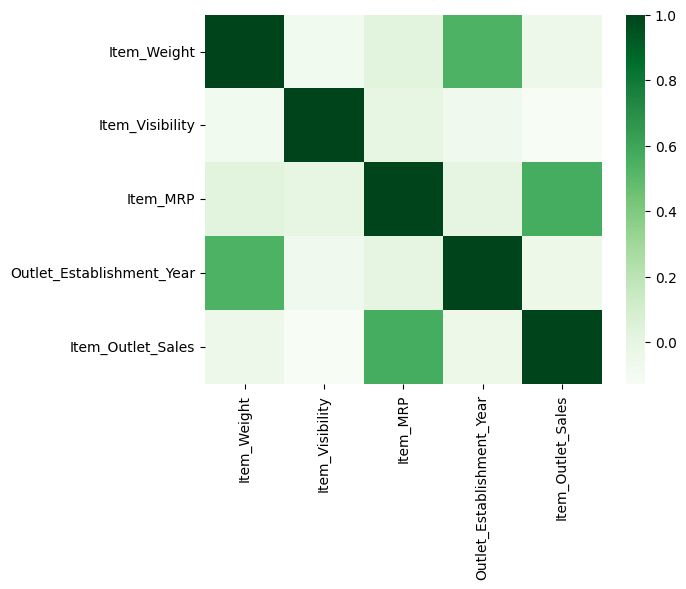

In [71]:
corr = data.corr(numeric_only = True)
corr.round(2)
sns.heatmap(corr, cmap = 'Greens');